In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import export_text

In [28]:
df = pd.read_csv('./../data/final.csv')

In [29]:
X = df.drop(columns = 'subreddit_bool')
y = df['subreddit_bool']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [70]:
rf = RandomForestClassifier()

In [71]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rf.score(X_train, y_train)

0.9869085898024805

In [73]:
rf.score(X_test,y_test)

0.6556473829201102

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
knn.score(X_train, y_train)

0.6844281120808452

In [77]:
knn.score(X_test,y_test)

0.5626721763085399

Running a couple basic models as a starting point then going to run a voting classifier so try and get a better result.  So far a base random forest is better but they both overfit with no parameter tuning.


I will drop the knn as it took a long time to run and the result was not good, instead I will run it using 4 others.

In [78]:
#lesson 6.01
# this is the start of a series of grid searches over different models
# this is to allow me to change the numbers for the search easily and limit the run time of each grid
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {
                        'max_depth': [12,20],
                        'min_samples_split': [10],
                        'min_samples_leaf': [6],
                        'ccp_alpha': [0.001]
                    },
                    cv = 5,
                    verbose = 1)

In [79]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0.001], 'max_depth': [12, 20],
        

In [80]:
grid.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 20,
 'min_samples_leaf': 6,
 'min_samples_split': 10}

In [81]:
grid.best_score_

0.6302239465800967

In [82]:
# lesson 6.01
print(export_text(grid.best_estimator_,
                  list(X_train.columns)))

|--- trump <= 0.50
|   |--- biden <= 0.50
|   |   |--- vote <= 0.50
|   |   |   |--- left <= 0.50
|   |   |   |   |--- abortion <= 0.50
|   |   |   |   |   |--- senate <= 0.50
|   |   |   |   |   |   |--- make <= 0.50
|   |   |   |   |   |   |   |--- lewis <= 0.50
|   |   |   |   |   |   |   |   |--- president <= 0.50
|   |   |   |   |   |   |   |   |   |--- blm <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- 2020 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- 2020 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- blm >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- president >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- lewis >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- make >  0.50
|   |   |   |   |   |   |   

See where it is spliting on a lot of the common words.

In [83]:
# second grid search
grid2 = GridSearchCV(GradientBoostingClassifier(),
                    param_grid = {
                        'n_estimators' :[100, 120],
                        'min_samples_leaf': [4],
                        'min_samples_split': [10],
                    },
                    cv = 5,
                    verbose = 1)

In [84]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [85]:
grid2.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 120}

In [86]:
grid2.best_score_

0.6476835979254918

In [87]:
# third grid search
grid3 = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                    param_grid = {
                        'base_estimator__max_depth': [2, 4],
                        'base_estimator__min_samples_split': [3, 5],
                        'base_estimator__min_samples_leaf': [3],                        
                    },
                    cv = 3,
                    verbose = 1)

In [88]:
grid3.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [89]:
grid3.best_params_

{'base_estimator__max_depth': 4,
 'base_estimator__min_samples_leaf': 3,
 'base_estimator__min_samples_split': 5}

In [90]:
grid3.best_score_

0.6329824464809741

In [91]:
# fourth grid search
grid4 = GridSearchCV(RandomForestClassifier(),
                    param_grid = {
                        'max_depth': [30,40],
                        'min_samples_leaf': [1, 2],
                    },
                    cv = 5,
                    verbose = 1)

In [92]:
grid4.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [93]:
grid4.best_params_

{'max_depth': 40, 'min_samples_leaf': 2}

In [94]:
grid4.best_score_

0.662609234992148

In [31]:
#lesson 6.04
# running a vote based on the hyperparams found in the grid search for each model

vote = VotingClassifier([
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2, min_samples_leaf= 3,min_samples_split = 3))),
    ('grad_boost', GradientBoostingClassifier(min_samples_leaf= 4, min_samples_split= 10, n_estimators= 120)),
    ('tree', DecisionTreeClassifier(ccp_alpha= 0.001,max_depth= 20,min_samples_leaf= 6,min_samples_split= 10)),
    ('rf', RandomForestClassifier(max_depth= 30, min_samples_leaf= 1))]
        
)


vote.fit(X_train, y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                       class_weight=None,
                                                                                       criterion='gini',
                                                                                       max_depth=2,
                                                                                       max_features=None,
                                                                                       max_leaf_nodes=None,
                                                                                       min_impurity_decrease=0.0,
                                                                                       min_impurity_split=None,
                                        

In [32]:
vote.score(X_train, y_train)

0.7041800643086816

In [33]:
vote.score(X_test, y_test)

0.6391184573002755

This vote model seems to remove the major overfitting issue of the two base models and has about the same end accuracy as the random forest.  This seem to be a better result as it has the train and test close.

I do not seem to be able to get higher than this test score after main grid search runs on the different models.

In [34]:
#lesson 5.05
# little visual for the predictions
preds = vote.predict(X_test)


tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


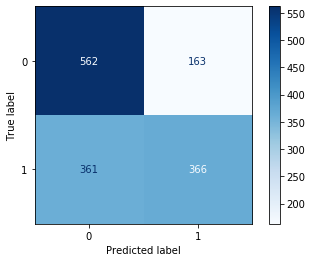

In [35]:
plot_confusion_matrix(vote, X_test, y_test, cmap = 'Blues', values_format = 'd');

Seems to predict more false negatives

In [93]:
comparison = pd.DataFrame(y_test).copy()

In [94]:
comparison['preds'] = preds

In [97]:
comparison.to_csv('./../data/comparison.csv')

Look at some prediction to see what might be the problem

In [49]:
#using the voting model to run the TF-IDF
df_tvec = pd.read_csv('./../data/final_tvec.csv')

In [50]:
X = df_tvec.drop(columns = 'subreddit_bool')
y = df_tvec['subreddit_bool']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [52]:
vote = VotingClassifier([
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2, min_samples_leaf= 3,min_samples_split = 3))),
    ('grad_boost', GradientBoostingClassifier(min_samples_leaf= 4, min_samples_split= 10, n_estimators= 120)),
    ('tree', DecisionTreeClassifier(ccp_alpha= 0.001,max_depth= 20,min_samples_leaf= 6,min_samples_split= 10)),
    ('rf', RandomForestClassifier(max_depth= 30, min_samples_leaf= 1))]
        
)


vote.fit(X_train, y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                       class_weight=None,
                                                                                       criterion='gini',
                                                                                       max_depth=2,
                                                                                       max_features=None,
                                                                                       max_leaf_nodes=None,
                                                                                       min_impurity_decrease=0.0,
                                                                                       min_impurity_split=None,
                                        

In [53]:
vote.score(X_train, y_train)

0.7133670188332568

In [54]:
vote.score(X_test, y_test)

0.6384297520661157

Both the count vectorize and the TF-IDF seem to get about the same result so no change there